In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [182]:
class NMF:
    
    def __init__(self):
        self.loss = []
        self.V = 0
        self.iteration = 0
        self.W = 0
        self.H = 0
        
    def Cost_function(A,B):
        n,m = A.shape
        cost = 0
        for i in range(n):
            for j in range(m):
                cost += (A[i][j] - B[i][j])**2
        return cost     
    
    def fit(self,V,r,iteration):
        self.V = V
        self.iteration = iteration
        m,n = self.V.shape
        #intialisation
        W = np.random.randint(1,15,size=(m,r))
        H = np.random.randint(1,5,size=(r,n))
        for i in range(self.iteration):
            H = np.multiply(H,(np.divide((np.dot(W.T,V)),(np.dot(W.T,np.dot(W,H))))))
            W = np.multiply(W,(np.divide((np.dot(V,H.T)),(np.dot(W,np.dot(H,H.T))))))
            self.loss.append(Cost_function(V,np.dot(W,H)))
        self.W = W
        self.H = H
        
    def plot_cost(self):
        y =np.array(self.loss) 
        x = np.arange(0,self.iteration)
        plt.title("cost")
        plt.xlabel("iter")
        plt.ylabel("Loss")
        plt.plot(x, y, color ="red")
        plt.show()
    
    def get_factors(self):
        return (self.W,self.H)
    

In [183]:
model = NMF()

In [184]:
test = np.arange(1,51).reshape(10,5)

model.fit(test,3,100)

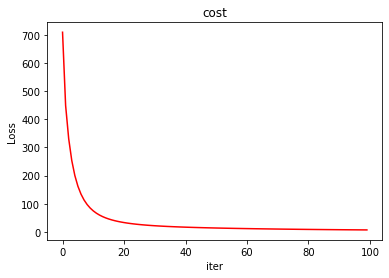

In [185]:
model.plot_cost()

In [187]:
W,H = model.get_factors()

In [189]:
(W@H).shape

(10, 5)